In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mars_df = pd.read_html("https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html")[0]

In [4]:
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [5]:
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [6]:
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"])
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [7]:
# 6. How many months exist on Mars? 
# ANSWER = 12 months
# value counts of months recorded
mars_df.value_counts("month")

month
4     194
3     192
2     178
1     174
12    166
5     149
6     147
7     142
8     141
11    138
9     134
10    112
dtype: int64

In [8]:
mars_df.count()

id                  1867
terrestrial_date    1867
sol                 1867
ls                  1867
month               1867
min_temp            1867
pressure            1867
dtype: int64

In [9]:
# 7. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
# Find the max sol
# ANSWER = 1977 Martian days
max_values = mars_df.max()
max_values

id                                 1895
terrestrial_date    2018-02-27 00:00:00
sol                                1977
ls                                  359
month                                12
min_temp                          -62.0
pressure                          925.0
dtype: object

In [10]:
# 8. What are the coldest and the warmest months on Mars (at the location of Curiosity)? 
# Get the answer by averaging the minimum daily temperature of all the months. 
# ANSWER: Coldest month is 3. Warmest month is 8.
# Plot the results as a bar chart.
#describe for each month to pull min

monthly_avg = mars_df.groupby(['month']).mean().reset_index()
monthly_avg.sort_values('min_temp')


,month,id,sol,ls,min_temp,pressure
2,3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
3,4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
1,2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
4,5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
0,1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
5,6,735.306122,750.829932,164.897959,-75.299320,745.054422
11,12,931.602410,990.951807,344.692771,-74.451807,842.156627
6,7,714.549296,715.105634,194.894366,-72.281690,795.105634
10,11,874.246377,947.224638,314.536232,-71.985507,857.014493
9,10,955.723214,1034.669643,286.330357,-71.982143,887.312500


In [11]:
monthly_avg_temp = monthly_avg[['month', 'min_temp']].copy()
monthly_avg_temp.sort_values('min_temp')

,month,min_temp
2,3,-83.307292
3,4,-82.747423
1,2,-79.932584
4,5,-79.308725
0,1,-77.160920
5,6,-75.299320
11,12,-74.451807
6,7,-72.281690
10,11,-71.985507
9,10,-71.982143


<AxesSubplot:xlabel='month'>

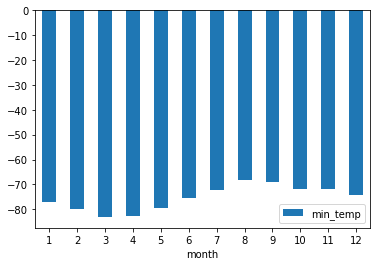

In [12]:
temp_bar_chart = monthly_avg_temp.plot(x="month", y=["min_temp"], kind="bar", rot=0)
temp_bar_chart

In [13]:
monthly_avg

,month,id,sol,ls,min_temp,pressure
0,1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
1,2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
2,3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
3,4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
4,5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
5,6,735.306122,750.829932,164.897959,-75.299320,745.054422
6,7,714.549296,715.105634,194.894366,-72.281690,795.105634
7,8,718.078014,795.333333,224.347518,-68.382979,873.829787
8,9,785.843284,861.186567,254.052239,-69.171642,913.305970
9,10,955.723214,1034.669643,286.330357,-71.982143,887.312500


In [30]:
describe = mars_df.groupby(['month']).describe()
describe
describe.to_csv('describe_table2.csv')

,id,sol,ls,min_temp,pressure
month,,,,,
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
6,735.306122,750.829932,164.897959,-75.299320,745.054422
12,931.602410,990.951807,344.692771,-74.451807,842.156627
7,714.549296,715.105634,194.894366,-72.281690,795.105634
11,874.246377,947.224638,314.536232,-71.985507,857.014493


In [14]:
# 9. Which months have the lowest and the highest atmospheric pressure on Mars? 
# Get the answer by averaging the daily atmospheric pressure of all the months. 
# ANSWER: Lowest athmospheric pressure in in Month 6. Highest is in Month 9.
# Plot the results as a bar chart.
monthly_avg_pressure = monthly_avg[['month', 'pressure']].copy()
monthly_avg_pressure.sort_values('pressure')

,month,pressure
5,6,745.054422
4,5,748.557047
6,7,795.105634
3,4,806.329897
11,12,842.156627
10,11,857.014493
0,1,862.488506
7,8,873.829787
2,3,877.322917
9,10,887.312500


<AxesSubplot:xlabel='month'>

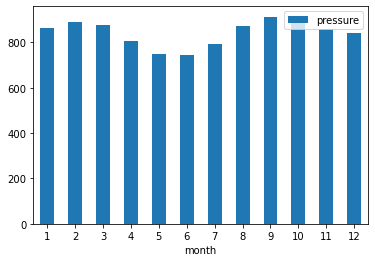

In [15]:
pressure_bar_chart = monthly_avg_pressure.plot(x="month", y=["pressure"], kind="bar", rot=0)
pressure_bar_chart

In [16]:
# 10 About how many terrestrial (Earth) days exist in a Martian year? 
# That is, in the time that Mars circles the Sun once, how many days elapse on Earth? 
# Visually estimate the result by plotting the daily minimum temperature.
# line chart sol and ls

sol_ls = mars_df[['sol', 'ls']].copy()
sol_ls

,sol,ls
0,10,155
1,11,156
2,12,156
3,13,157
4,14,157
...,...,...
1862,1973,133
1863,1974,134
1864,1975,134
1865,1976,135


<AxesSubplot:xlabel='sol'>

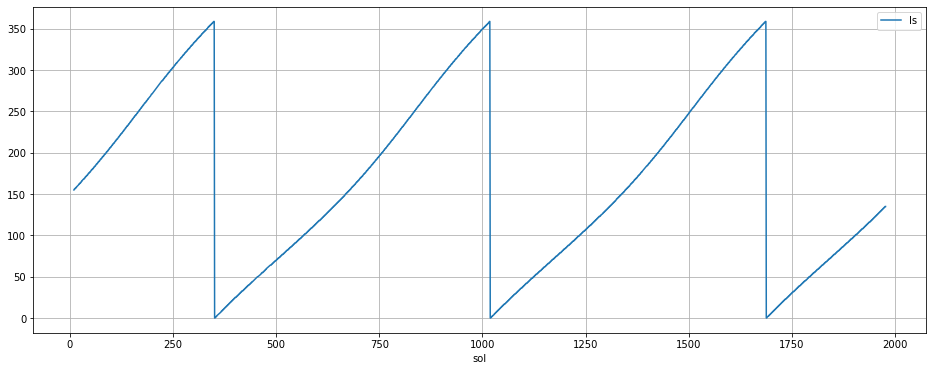

In [90]:
earth_days_chart = sol_ls.plot(x="sol", y=["ls"], kind="line", rot=0, grid=True,figsize=(16,6))
earth_days_chart
#ANSWER = Approximately 687.5 terrestrial days = 1 martian years

In [17]:
# Export the DataFrame to a CSV file
output_data_file = "exported_dfs/mars_df.csv"

mars_df.to_csv(output_data_file, encoding='utf-8')